In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy.optimize import root

In [2]:
# semi major axis, a calculation using neutron star as companion

p = 16.35
P = 16.35 * 24 * 60 * 60  # periodcity ( 16.35 day to second)
m = 2 * 10 ** (33) * 10   # total mass of binary (gram convert to solar mass)
G = 6.7 * 10 ** (-8)   
pi = constants.pi      # pi value

#a1 = 4 * 10 ** (12) * m ** (1/3) * p ** (2/3)
a = ( G * m ) ** (1/3) * (P / (2 * pi)) ** (2 / 3)
print(f"a = {a}")
#print(f"a1 = {a1}")    

a = 4076330172615.2104


In [3]:
# finding fraction different of active window and periodcity

aW = 4          # active window

frac = aW / p

print(f"fraction = {frac}")

fraction = 0.24464831804281342


In [4]:
# finding opening angle from the fraction of active window and periodicity (eq 13 paper IZ)
theta_op = frac * pi
theta_op_angle = frac * 180

print(f"opening angle in pi = {theta_op} * pi")
print(f"opening angle in angle = {theta_op_angle} degree")

opening angle in pi = 0.7685853586764019 * pi
opening angle in angle = 44.036697247706414 degree


In [5]:
# finding minimum size, r_0 required for a to maintain funnel as relative to a

r_0 = 1 / ( (1 / np.sin(theta_op)) * np.sqrt(3 * (1 + (pi - theta_op) * (1 / np.tan(theta_op) ) ) ) )

print(f"Minium value of a opening is {r_0}a")

r_0_value = r_0 * a  # equation 15 I&Z
print(f"Numerical value of r_0 = {r_0_value}")

r_0_max = 0.5 * a  # equation 16 I&Z
print(f"Numerical value of r_0 = {r_0_max}")

Minium value of a opening is 0.21593668889901113a
Numerical value of r_0 = 880229240333.6631
Numerical value of r_0 = 2038165086307.6052


In [6]:
def eqn(x):
  return - x + np.tan(x) + pi

root_1 = root(eqn, 0)

print(root_1.x)

[3.14158123]


In [ ]:
# finding the value for Beta Eq 10 WIZ paper (max Lw)

Lw =  1 * 10 ** 30   # Luminosity of FRB pulsar wind (ergs/s)
c = constants.c     # Speed of light 
M = 10 ** (-9) * (2 * 10 ** 33) / (365 * 24 * 60 * 60)     # mass-loss rate (solar mass per year to gram/s)
V = 3 * 10 ** (-2) * ( constants.c ) # wind velocity (unit of c)

B = ( Lw / c ) / ( M * V )

# finding the theta_c, half opening angle determined by the pressure balance between FRB pulsar wind and companian wind

def eqn(theta_c):
    return - theta_c + np.tan(theta_c) - ( B * pi ) / ( 1 - B )

myroot = root(eqn, 0)

print(f"B = {B}")
print(f" theta_c = {myroot.x}")

B = 0.005848088694617819
 theta_c = [0.37405387]


In [ ]:
# finding the value for Beta Eq 10 WIZ paper (max Lw)

Lw = 1 * 10 ** 39   # Luminosity of FRB pulsar wind
c = constants.c     # Speed of light 
M = 10 ** (-9) * (2 * 10 ** 33) / (365 * 24 * 60 * 60)     # mass-loss rate (solar mass per year to gram/s)
V = 3 * 10 ** (-2) * ( constants.c ) # wind velocity (unit of c)

B = ( Lw / c ) / ( M * V )

# finding the theta_c, half opening angle determined by the pressure balance between FRB pulsar wind and companian wind

def eqn(theta_c):
    return - theta_c + np.tan(theta_c) - ( B * pi ) / ( 1 - B )

myroot = root(eqn, 0)

print(f"B = {B}")
print(f" theta_c = {myroot.x}")

B = 5848088.694617819
 theta_c = [3.1298686]


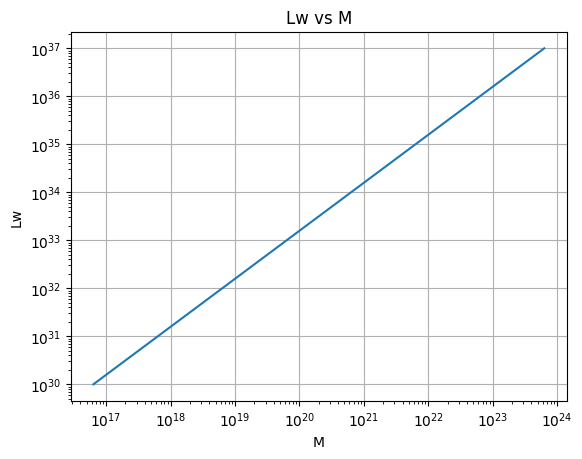

 B =  message: The solution converged.
 success: True
  status: 1
     fun: [ 8.604e-16]
       x: [ 5.938e-02]
  method: hybr
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [ 3.551e+00]
     qtf: [ 8.431e-10]


In [17]:
# finding the value for Beta Eq 10 WIZ paper (max Lw)
theta_c = theta_op

def eqn(B):
    return - theta_c + np.tan(theta_c) - ( B * pi ) / ( 1 - B )

B_value = root(eqn, 0)

Lw =  1 * 10 ** 30   # Luminosity of FRB pulsar wind (ergs/s)
c = constants.c     # Speed of light 
M = 10 ** (-9) * (2 * 10 ** 33) / (365 * 24 * 60 * 60)     # mass-loss rate (solar mass per year to gram/s)
V = 3 * 10 ** (-2) * ( constants.c ) # wind velocity (unit of c)

B = ( Lw / c ) / ( M * V )


M = np.logspace(-9, -2, 1000) * (2 * 10 ** 33) / (365 * 24 * 60 * 60)  # ploting x-axis (solar mass / year)
Lw = B * (M * V) * c    #ploting y-axis

# plot the data
plt.plot(M, Lw, label='Lw vs M')

#Add label
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M')
plt.ylabel('Lw')
plt.title('Lw vs M')
plt.grid(True)
plt.show()


#print(f"B = {B}")
print(f" B = {B_value}")

In [ ]:
# finding the Photospheric radius using Eq 4 & 5 WIZ paper

sigma_T =              # Thomson cross section
m_p =                  # mass of proton
V =                    # Wind Velocity, same as before
R =                    # Binary Seperation

T =               # temperature of the wind
f =               # frequency of the FRB
g_ff =              # Gaunt factor for Bremsstrahlung

q =                 # elementary charge
k =                 # Boltzman's Constant

# Optical Depth due to Thompson Scattering Eq 4
Depth_th = ((sigma_T * M ) / (4 * np.pi * V * R * m_p)) * ((r / R) / ( r/R ) ** 2)

# Optical Depth due to free-free absorptions Eq 5
Depth_ff = (4 * q ** 6 ) / (3 * m_e * constants.c * k) * ( 2 * np.pi / (3 * k * m_e )) ** (1/2) * T ** ( -3 / 2 ) * f ** (-2) * g_ff * ( M / (4 * np.pi   * V * m_p * R ** 2)) ** 2 * R * ((r/R)/(r/R) ** 4)

# Optical Depth due to Induced Compton Scattering Eq 6
Depth_idC = 3 *  

SyntaxError: invalid syntax (3733900817.py, line 3)

In [ ]:
# finding comb length,   (spiral arm) from eq 14 WIZ

M_tot = 
p
omega = np.sqrt(G * M_tot / (a ** 3)

# comb length eq assuming e = 0
r_s = np.sin(theta_c) * V / omega - a